#### Study to look for patterns for endangered species in national parks

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1) Loading datasets

In [29]:
observations = pd.read_csv("observations.csv")

species_info = pd.read_csv("species_info.csv")

#### 2) sample of datasets

In [31]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [32]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


#### 3) Summary and counts of datasets.

In [50]:
print(observations.describe())
print("\n")
print(observations.isna().sum())
print("\n")
print(observations.shape)

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


scientific_name    0
park_name          0
observations       0
dtype: int64


(23296, 3)


In [53]:
print(species_info.describe())
print("\n")
print(species_info.isna().sum())
print("\n")
print(species_info.shape)

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


(5824, 4)


#### 4) Uniqueness

In [36]:
print(observations.park_name.unique().tolist())

['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']


In [89]:
categories = species_info.category.unique().tolist()
print(categories)

['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']


In [97]:
status = species_info.conservation_status.unique().tolist()
print(status)

In [93]:
scientific_name = species_info.scientific_name.unique().tolist()
#print(scientific_name)

#### 5) Cleaning nan values from species_info dataframe

In [56]:
species_info_nona = species_info.dropna()

In [107]:
print(species_info_nona.columns)
print("\n")
print(species_info_nona.shape)
print("\n")

status = species_info_nona.conservation_status.unique().tolist()
print(status)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


(191, 4)


['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


#### 6) Plotting some insights about conservation status vs category

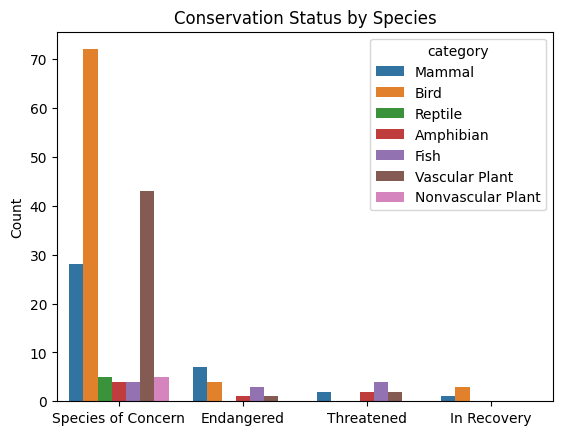

<Figure size 640x480 with 0 Axes>

In [158]:
sns.countplot(x="conservation_status", data = species_info_nona, hue = "category")

plt.title("Conservation Status by Species")

plt.xlabel("")
plt.ylabel("Count")

plt.show()
plt.clf()

#### As we can see, Category species of concern are the most relevant in counts of species, specially for vascular plants, mammals and birds.

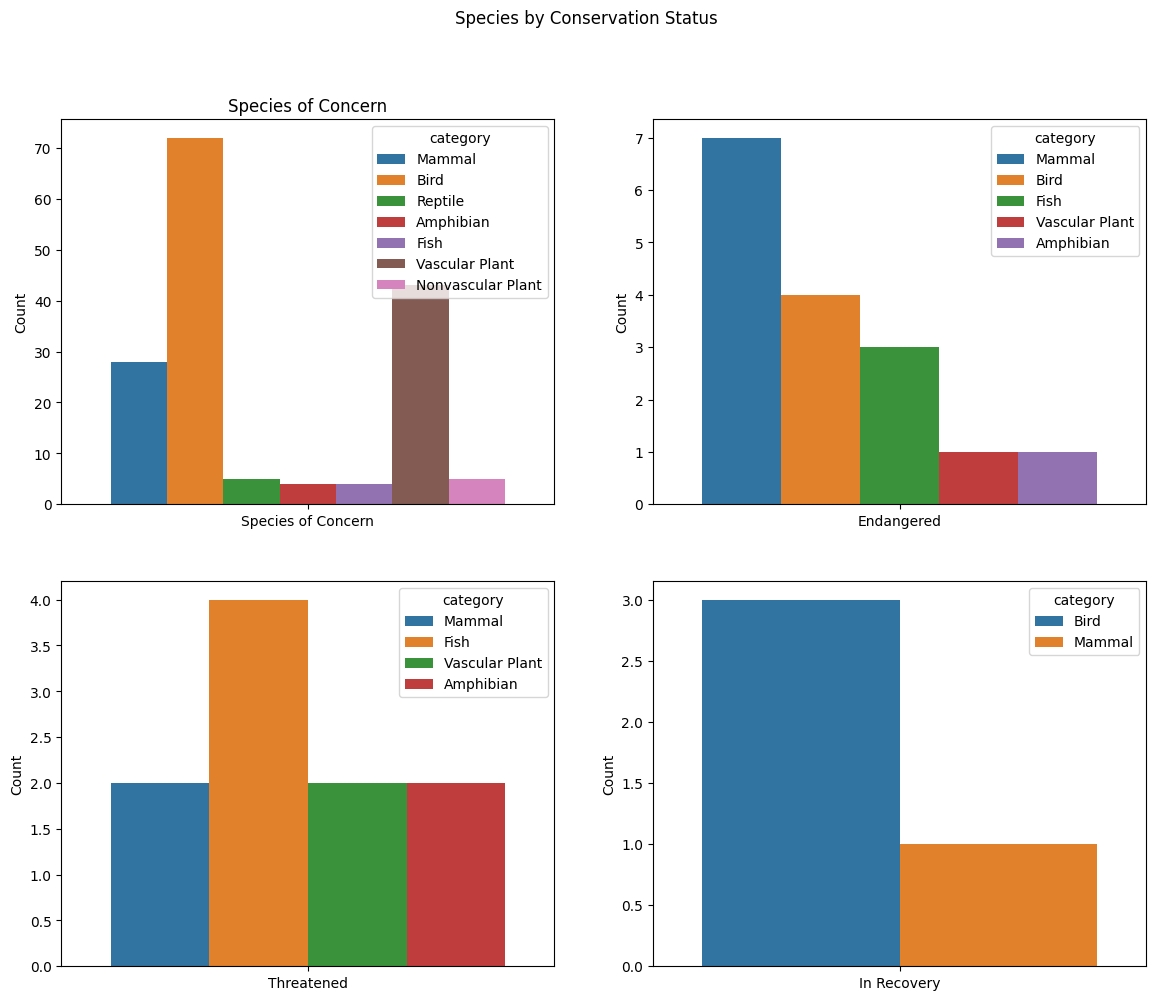

<Figure size 640x480 with 0 Axes>

In [162]:
fig, axs = plt.subplots(2, 2, sharex=False, figsize=(14,11))

fig.suptitle('Species by Conservation Status')

x_lab = "conservation_status"
y_lab = "Count"

sns.countplot(ax = axs[0,0], x=x_lab, data = species_info_nona[species_info_nona[x_lab]==status[0]], hue = "category")

axs[0, 0].set_title(status[0])


sns.countplot(ax = axs[0,1], x=x_lab, data = species_info_nona[species_info_nona[x_lab]==status[1]], hue = "category")

sns.countplot(ax = axs[1,0], x=x_lab, data = species_info_nona[species_info_nona[x_lab]==status[2]], hue = "category")

sns.countplot(ax = axs[1,1], x=x_lab, data = species_info_nona[species_info_nona[x_lab]==status[3]], hue = "category")

plt.subplots_adjust(bottom=None,left = None, right=None, top=None, wspace=0.2, hspace=0.2)

for ax in axs.flat:
    ax.set(xlabel= "", ylabel= y_lab)

plt.show()    
plt.clf()
    

#### As we can see above, separately, we can see more clearly the counts for each category!

In [172]:
merged = pd.merge(observations, species_info_nona, on = "scientific_name")

In [173]:
print(merged.count())

scientific_name        880
park_name              880
observations           880
category               880
common_names           880
conservation_status    880
dtype: int64
